# Business Objective:
    This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.
The data file contains 7 features about 250 companies
The data set includes the following variables:
1. industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2. management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3. financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4. credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5. competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6. operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7. class: bankruptcy, non-bankruptcy (target variable).



### Loading libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

### Importing the Bankrupt Dataset

In [2]:
#loading dataset
bank=pd.read_csv('C:/Users/vijay/Documents/DS Project/project_2/bankruptcy-prevention.csv',sep=';',header=0)
# Display the first 5 rows of the dataset
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [3]:
# remove special character
bank.columns = bank.columns.str.replace(' ', '')

In [4]:
# Display the last 5 rows of the dataset
bank.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [5]:
type(bank)

pandas.core.frame.DataFrame

In [6]:
# Get information about the dataset
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [7]:
# Get a summary of the dataset
bank.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Get the number of rows and columns in the dataset
bank.shape

(250, 7)

## Data quality check and Missing Values

In [9]:
#Check for missing values: Check if there are any missing values in your dataset using the isnull() function.
# Check for missing values
bank.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

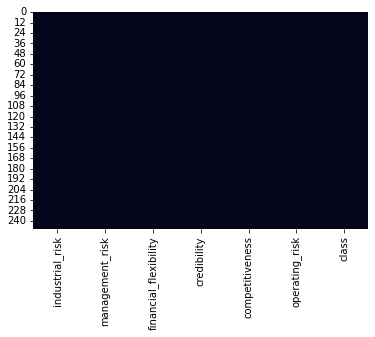

In [10]:
# Visualize the missing values using heatmap
sns.heatmap(bank.isnull(), cbar=False)
plt.show()

In [11]:
bank['class'].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

### Check for class imbalance:

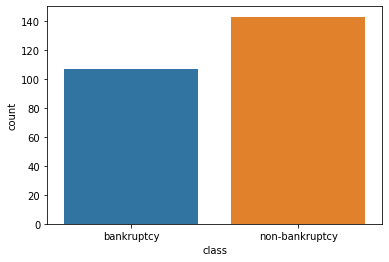

In [12]:
#Check for class imbalance: Check if there is any class imbalance in your dataset. You can plot the class distribution using a bar plot.
sns.countplot(x='class', data=bank) 
plt.show()

In [13]:
# Group the dataset by the target variable and calculate the statistics
class_stats = bank.groupby('class').agg(['count', 'mean', 'std'])

# Print the statistics
class_stats

industrial_risk                     management_risk            \
                         count      mean       std           count      mean   
class                                                                          
bankruptcy                 107  0.626168  0.412616             107  0.789720   
non-bankruptcy             143  0.437063  0.393016             143  0.482517   

                         financial_flexibility                      \
                     std                 count      mean       std   
class                                                                
bankruptcy      0.336725                   107  0.028037  0.134441   
non-bankruptcy  0.412876                   143  0.636364  0.331353   

               credibility                     competitiveness            \
                     count      mean       std           count      mean   
class                                                                      
bankruptcy             107  0.107477  0.238193             107  0.018692   
non-bankruptcy         143  0.741259  0.295823             143  0.818182   

                         operating_risk                      
                     std          count      mean       std  
class                                                        
bankruptcy      0.095296            107  0.710280  0.388741  
non-bankruptcy  0.241368            143  0.465035  0.438669

### Explore individual features:

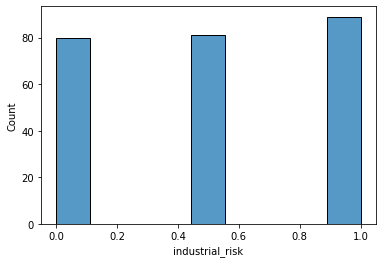

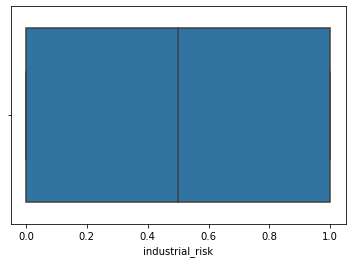

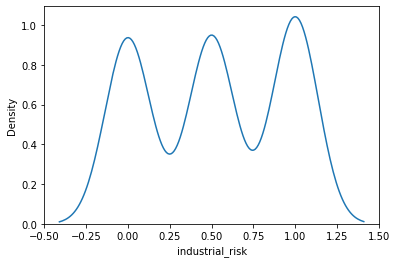

In [14]:
#Explore individual features: Explore each feature in your dataset using histograms, boxplots, or density plots. You can use the following code to plot a histogram of a feature:
# Plot a histogram of a feature
sns.histplot(data=bank, x='industrial_risk')
plt.show()

# Plot a boxplot of a feature
sns.boxplot(data=bank, x='industrial_risk')
plt.show()

# Plot a density plot of a feature
sns.kdeplot(data=bank, x='industrial_risk')
plt.show()

### Explore multiple features:

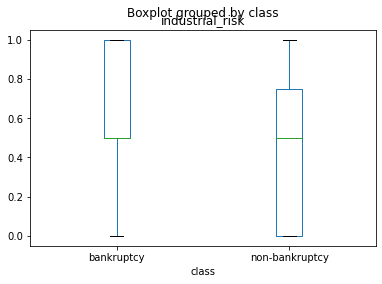

In [15]:
bank.boxplot(by ='class', column =['industrial_risk'], grid = False)
plt.show()

<AxesSubplot:title={'center':'competitiveness'}, xlabel='class'>

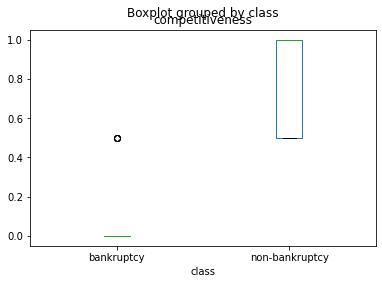

In [16]:
 bank.boxplot(by ='class', column =['competitiveness'], grid = False)

<AxesSubplot:title={'center':'management_risk'}, xlabel='class'>

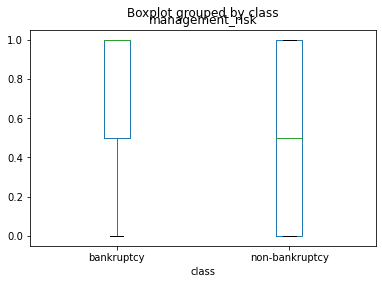

In [17]:
bank.boxplot(by ='class', column =['management_risk'], grid = False)

<AxesSubplot:title={'center':'operating_risk'}, xlabel='class'>

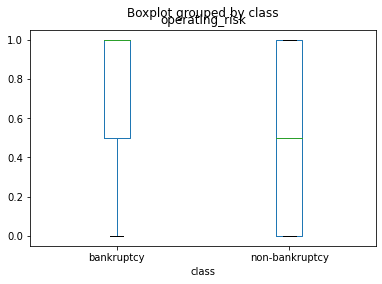

In [18]:
bank.boxplot(by ='class', column =['operating_risk'], grid = False)

<AxesSubplot:title={'center':'operating_risk'}, xlabel='class'>

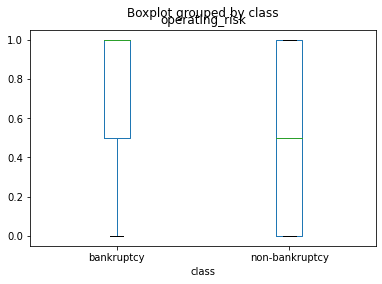

In [19]:
 bank.boxplot(by ='class', column =['operating_risk'], grid = False)

<AxesSubplot:title={'center':'financial_flexibility'}, xlabel='class'>

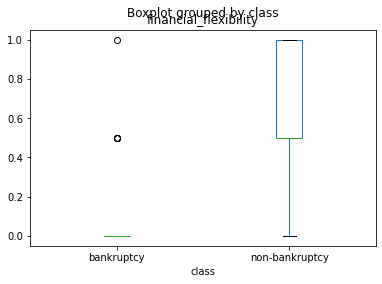

In [20]:
bank.boxplot(by ='class', column =['financial_flexibility'], grid = False)

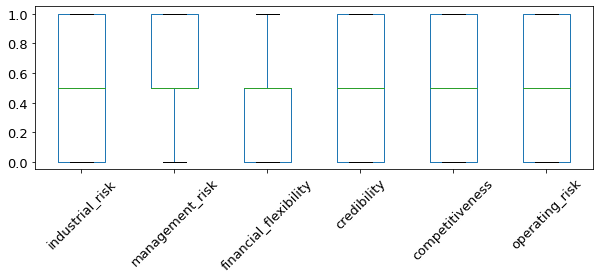

In [21]:
fig = plt.figure(figsize = (10, 3)) 
boxplot = bank.boxplot(grid=False, rot=45, fontsize=13)  

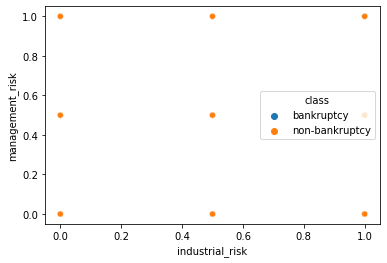

In [22]:
# Plot a scatterplot of two features
sns.scatterplot(data=bank, x='industrial_risk', y='management_risk', hue='class')
plt.show()

### Feature engineering:

### Here we are changing the target variable to bankruptcy = 0, non-bankruptcy = 1

In [23]:
bank_new = bank.iloc[:,:]
bank_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [24]:
bank_new["class_yn"] = 1
bank_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [25]:

bank_new.loc[bank['class'] == 'bankruptcy', 'class_yn'] = 0
bank_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [26]:
bank_new.drop('class', inplace = True, axis =1)
bank_new.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [27]:
#import Labelencoder
#from sklearn.preprocessing import LabelEncoder

In [28]:
#labelencoder = LabelEncoder()
#bank.iloc[:, -1] = labelencoder.fit_transform(bank.iloc[:,-1])

In [29]:
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


### Using Label Encoder at a categorical column to get binary value as its a classification project

# Exploratory Data Analysis (EDA)

In [30]:
# checking correlation
bank_corr=bank.corr()
bank_corr

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_yn,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


### IN this correlation matrix we can see no columns are correlated to each other neither input variables

<AxesSubplot:>

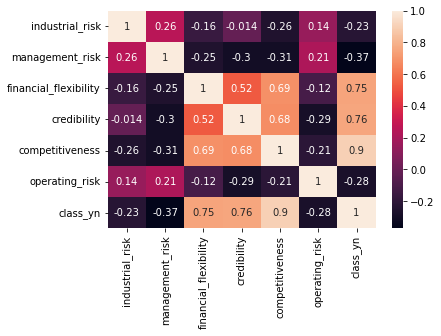

In [31]:
# correlation 
sns.heatmap(bank_corr,annot=True)

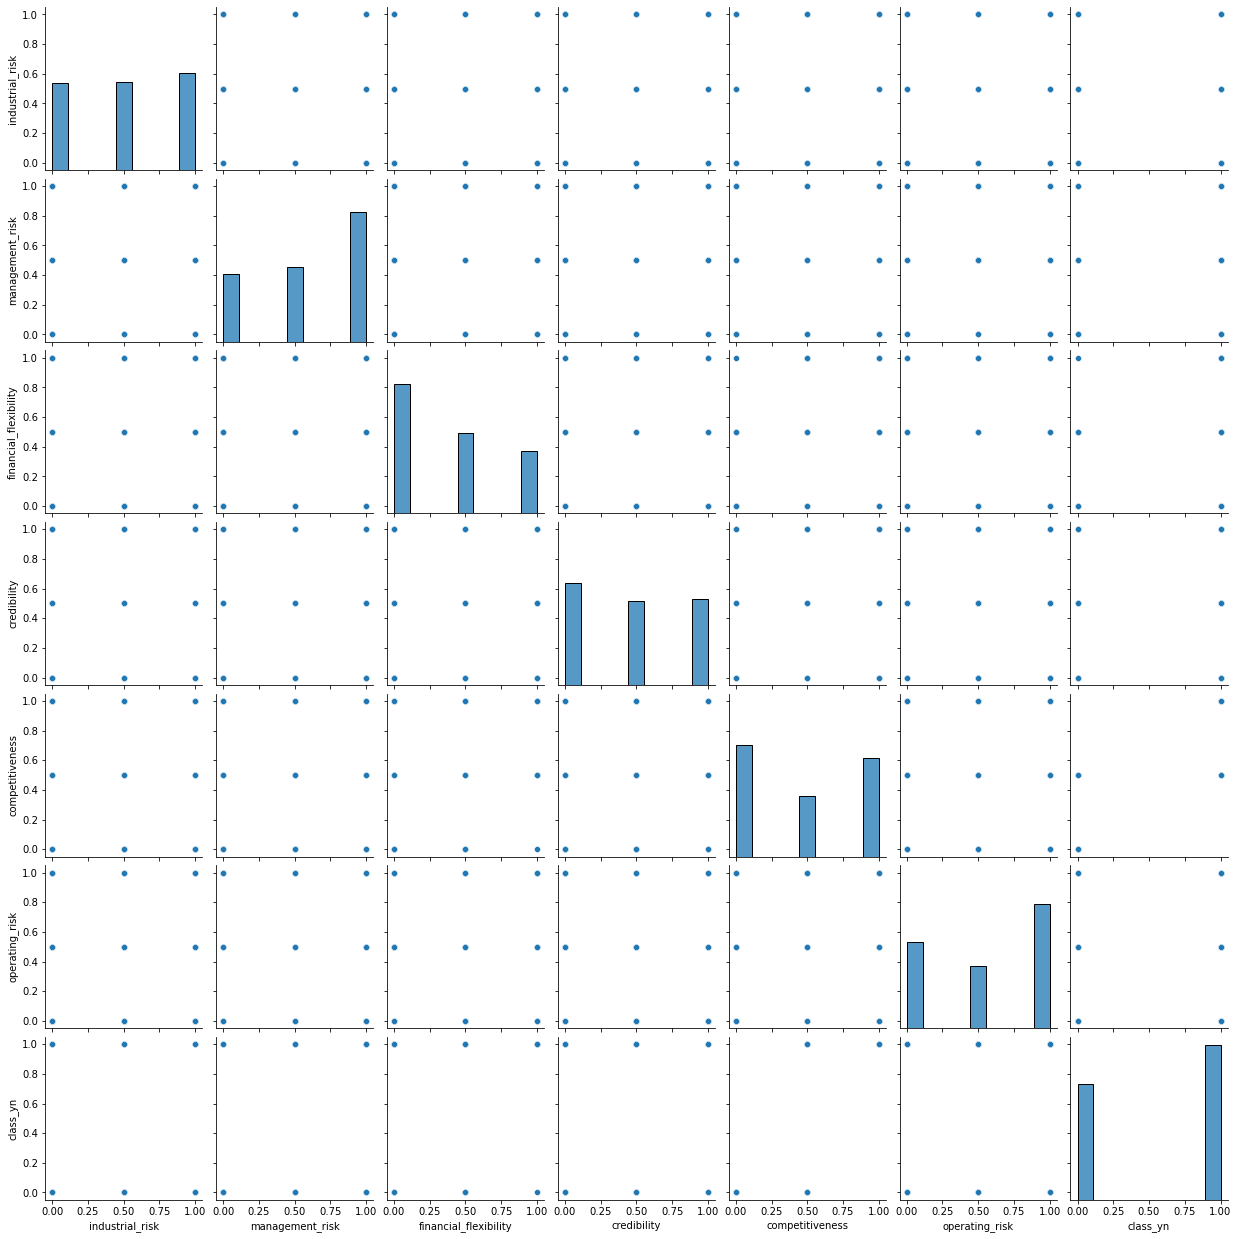

In [32]:
# Create the default pairplot  OUTLIER DETECTION AND DATA VISUALIZATION
sns.pairplot(bank)

<AxesSubplot:xlabel='class_yn', ylabel='count'>

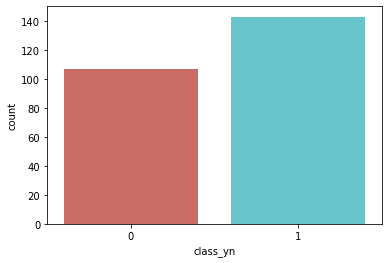

In [33]:
sns.countplot(x = 'class_yn', data = bank, palette = 'hls')

<AxesSubplot:xlabel='financial_flexibility', ylabel='count'>

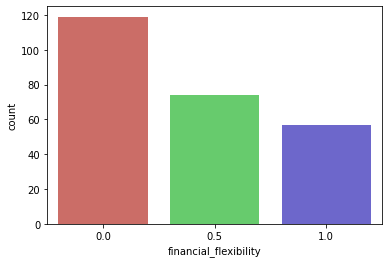

In [34]:

sns.countplot(x = 'financial_flexibility', data = bank_new, palette = 'hls')

<AxesSubplot:xlabel='class_yn'>

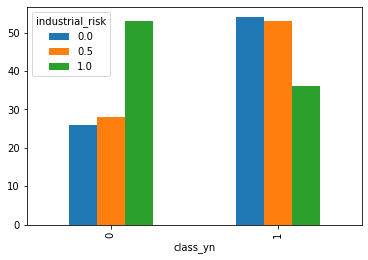

In [35]:
# for visualization 

pd.crosstab(bank.class_yn, bank.industrial_risk).plot(kind='bar')

In [36]:
bank_new.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class_yn'],
      dtype='object')

<AxesSubplot:xlabel='financial_flexibility'>

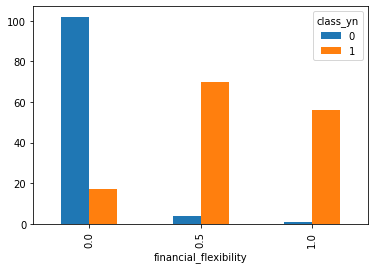

In [37]:
pd.crosstab(bank_new['financial_flexibility'], bank_new['class_yn']).plot(kind = 'bar')

<AxesSubplot:xlabel='credibility'>

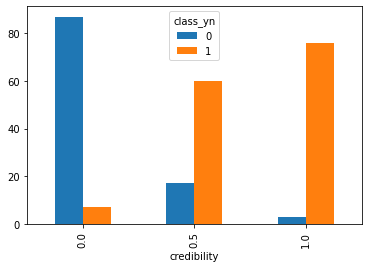

In [38]:
pd.crosstab(bank_new['credibility'], bank_new.class_yn).plot(kind = 'bar')

<AxesSubplot:xlabel='operating_risk'>

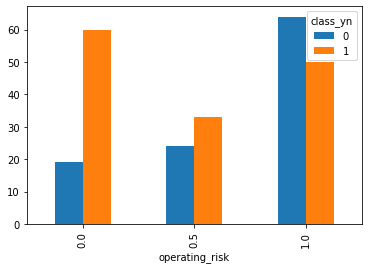

In [39]:
pd.crosstab(bank_new['operating_risk'], bank_new.class_yn).plot(kind='bar')

<AxesSubplot:xlabel='financial_flexibility'>

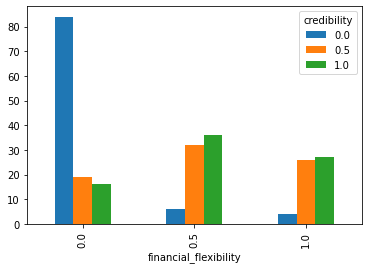

In [40]:
pd.crosstab(bank_new['financial_flexibility'], bank_new['credibility']).plot(kind = 'bar')

In [41]:
np.shape(bank_new)

(250, 7)

In [42]:
#input
x=bank_new.iloc[:,:-1]
y=bank_new.iloc[:,-1]

In [43]:
from sklearn.model_selection import train_test_split  #train and test
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

### splitting the data into train data and test dat

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

## preparing the model

### 1) Logistics Regression

In [45]:
from sklearn.linear_model import LogisticRegression

log_class = LogisticRegression()

In [46]:
log_class.fit(x_train,y_train)

LogisticRegression()

In [47]:
# coefficients of features
log_class.coef_

array([[-0.43044914, -0.73309162,  2.37729553,  2.31022854,  3.68601327,
        -0.53101906]])

###  After the train the model then we prediction on test data

In [48]:
# y_prediction
y_pred=log_class.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

### let's test the performance of our model - confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix

confusion_log = confusion_matrix(y_test,y_pred)

confusion_log

array([[26,  0],
       [ 0, 37]], dtype=int64)

### Accuracy of model

In [50]:
# Train Accuracy

train_acc_log = np.mean(log_class.predict(x_train)== y_train)

train_acc_log

0.9946524064171123

In [51]:
# checking test accuracy
test_acc_log = np.mean(log_class.predict(x_test)== y_test)

test_acc_log

1.0

In [52]:
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

1.0

## Accuracy of overall model

In [53]:
log_class.fit(x,y)

#coffecients of feature
log_class.coef_

array([[-0.5741981 , -0.75397787,  2.61063166,  2.41434068,  4.00955826,
        -0.51358089]])

In [54]:
#overall prediction
y_pred = log_class.predict(x)

#confusion matrix

confusion_max = confusion_matrix(y,y_pred)

confusion_max

array([[106,   1],
       [  0, 143]], dtype=int64)

In [55]:
#accuracy
acc = accuracy_score(y,y_pred)
acc

0.996

In [56]:
log_class.score(x_test,y_test)

1.0

In [57]:
log_class.score(x_train,y_train)

0.9946524064171123

#### From the accuracy we can say that the model is overfitted to avoid overfit problem we use Regularazation method

#### here we have L1, L2 regularization

It turns out they have different but equally useful properties. From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero.

#### L1 = lasso regularization

In [58]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100,tol = 0.1)

lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [59]:
lasso_reg.score(x_test,y_test)

-0.0017265366431771234

In [60]:
lasso_reg.score(x_train,y_train)

0.0

### L2 = Ridge regularization

In [61]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)

ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [62]:
ridge_reg.score(x_test, y_test)

0.7688398562243317

In [63]:
ridge_reg.score(x_train, y_train)

0.7452859981668722

In [64]:
ridge_reg.score(x_train, y_train)

0.7452859981668722

### 2) KNN model

In [65]:
#import KNN Classifer
from sklearn.neighbors import KNeighborsClassifier as KNC
import warnings
warnings.filterwarnings('ignore')

# To choose K value

In [66]:
import math
math.sqrt(len(y_test))

7.937253933193772

Here we are choosing the k value to be 7 (choosing odd value)

Define the model KNN and fit model

In [67]:
KNN_classifier = KNC(n_neighbors = 7,p = 2, metric = 'euclidean')

In [68]:
KNN_classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

## Predict Test Result

In [69]:
y_pred=KNN_classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

### Evaluate model

In [70]:
#caluating confusion matrix
from sklearn.metrics  import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[26  0]
 [ 1 36]]


In [71]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.9863013698630138


### Accuracy of KNN Model

In [72]:
from sklearn.metrics import accuracy_score

KNN_acc = accuracy_score(y_test,y_pred)
KNN_acc

0.9841269841269841

### 3) Naive Bayes Classifier

In [73]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB

In [74]:
#Creating GaussianNB and MultinomialNB functions
GNB = GaussianNB()
MNB = MultinomialNB()

### Building the model with GaussianNB

In [75]:
Naive_GNB = GNB.fit(x_train,y_train)

y_pred = Naive_GNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

### Evaluate Model

In [76]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[26  0]
 [ 0 37]]


### Accuracy GNB

In [77]:
# caluating accuracy score
from sklearn.metrics import accuracy_score

GNB_acc = accuracy_score(y_test,y_pred)
GNB_acc

1.0

### Building the model with MultinomialNB

In [78]:
Navie_MNB=MNB.fit(x_train, y_train)

y_pred = Navie_MNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

## Evaluating Model

In [79]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 0 37]]


## Accuracy of MNB

In [80]:
from sklearn.metrics import accuracy_score

MNB_acc = accuracy_score(y_test,y_pred)

MNB_acc

1.0

### 4). Support Vector Machine

In [81]:
#import Support vector Machine
from sklearn.svm import SVC

## Kernel = Linear model

In [82]:
model_linear = SVC(kernel = 'linear')

model_linear.fit(x_train,y_train)

pred_test_linear = model_linear.predict(x_test)

np.mean(pred_test_linear==y_test)

1.0

## Kernel = ploy model

In [83]:
model_poly = SVC(kernel = 'poly')

model_poly.fit(x_train,y_train)

pred_test_poly = model_poly.predict(x_test)

np.mean(pred_test_poly==y_test) # Accuracy

0.9841269841269841

### Kernel = 'rbf' model --> Radial Basis Function

In [84]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

np.mean(pred_test_rbf==y_test) # Accuracy

1.0

from the above kernels in SVM polynomial kernel giving good accuracy

In [85]:
import pickle
pickle_out = open("model_poly.pkl","wb")
pickle.dump(model_poly, pickle_out)
pickle_out.close()